In [17]:
import numpy as np
from tqdm import tqdm
from gym_env import BeloteGameEnv
from q_player_class import QPlayer
from player_class import DumbPlayer

In [13]:
# load Q-table
Qtable = np.load('../Qtable.npy')

In [14]:
def state_to_idx(state):
	"""
	Maps a state (represented as a tuple of 5 values) to an index between 0 and 16,806.
	"""
	idx = 0
	for i, value in enumerate(state):
		idx += value * (7 ** i)
	return idx

In [15]:
def greedy_policy(Qtable, state):
	# Exploitation: take the action with the highest state, action value
	state_idx = state_to_idx(state)
	action = np.argmax(Qtable[state_idx][:])
	return action

In [22]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):
	"""
	Evaluate the agent for ``n_eval_episodes`` episodes and returns average reward and std of reward.
	:param env: The evaluation environment
	:param n_eval_episodes: Number of episode to evaluate the agent
	:param Q: The Q-table
	:param seed: The evaluation seed array (for taxi-v3)
	"""
	episode_rewards = []
	for episode in tqdm(range(n_eval_episodes)):
		if seed:
			state, _ = env.reset(seed=seed[episode])
		else:
			state, _ = env.reset()
		done = False
		total_rewards_ep = 0

		for _ in range(max_steps):
			# Take the action (index) that have the maximum expected future reward given that state
			action = greedy_policy(Q, state)
			new_state, reward, done, _ = env.step(action)
			total_rewards_ep += reward

			if done:
				break
			state = new_state
		episode_rewards.append(total_rewards_ep)
	mean_reward = np.mean(episode_rewards)
	std_reward = np.std(episode_rewards)

	return mean_reward, std_reward, episode_rewards

In [23]:
q_player = QPlayer("QPlayer")

env = BeloteGameEnv(q_player, DumbPlayer("Player2"))

# Evaluation parameters
n_eval_episodes = 1000        # Total number of test episodes

# Environment parameters
max_steps = 10	             # Max steps per episode
eval_seed = []               # The evaluation seed of the environment

mean_reward, std_reward, episode_rewards = evaluate_agent(env, max_steps, n_eval_episodes, Qtable, eval_seed)

print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

100%|██████████| 1000/1000 [00:00<00:00, 1396.00it/s]

Mean_reward=33.04 +/- 27.62


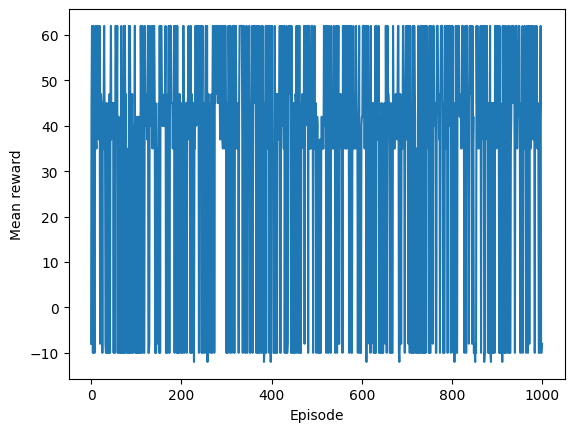

In [24]:
# plot the evolution of the mean reward over the episodes
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Mean reward')
plt.show()

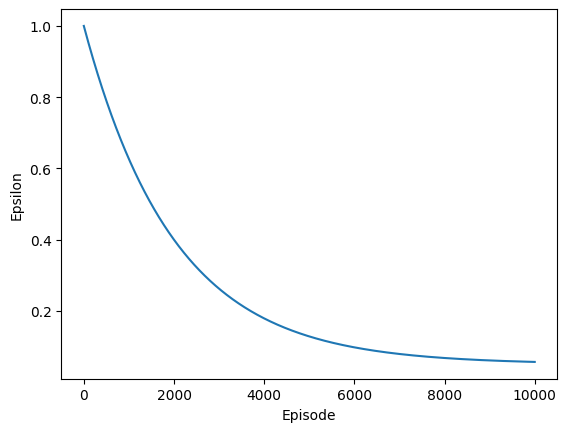

In [36]:
# plot the evolution of the epsilon over the episodes
# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.05            # Minimum exploration probability
decay_rate = 0.0005           # Exponential decay rate for exploration prob
n_training_episodes = 10_000  # Total training episodes

epsilons = []
for episode in range(n_training_episodes):
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    epsilons.append(epsilon)
plt.plot(range(n_training_episodes), epsilons)
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

In [79]:
# watch the agent play
from gym_env import BeloteGameEnv
from q_player_class import QPlayer
from player_class import DumbPlayer

Qtable = np.load('../Qtable.npy')

q_player = QPlayer("QPlayer")
player2 = DumbPlayer("Player2")

env = BeloteGameEnv(q_player, player2)

state, _ = env.reset()

print("Initial state:", state)
print("cartes en mains :")

print("q_player :",q_player.hand)
print("player2 :",player2.hand)

action = greedy_policy(Qtable, state)
print("carte jouée par le q_player :",q_player.hand[action])
print("carte jouée par le player2 :",player2.hand[0])
new_state, reward, done, _ = env.step(action)

print("state après le premier coup : ", new_state)
print("reward après le premier coup : ", reward)

print("coup numero 2 :")
action = greedy_policy(Qtable, new_state)
print("carte jouée par le q_player :",q_player.hand[action])
print("carte jouée par le player2 :",player2.hand[0])
new_state, reward, done, _ = env.step(action)

print("state après le deuxième coup : ", new_state)
print("reward après le deuxième coup : ", reward)

print("coup numero 3 :")
action = greedy_policy(Qtable, new_state)
print("carte jouée par le q_player :",q_player.hand[action])
print("carte jouée par le player2 :",player2.hand[0])
new_state, reward, done, _ = env.step(action)

print("reward après le troisième coup : ", reward)
print("done après le troisième coup : ", done)

Initial state: [6, 5, 1, 0, 0, 0, 0]
cartes en mains :
q_player : [2 of Diamonds, 1 of Diamonds, 1 of Hearts]
player2 : [2 of Hearts, 1 of Spades, 2 of Spades]
carte jouée par le q_player : 2 of Diamonds
carte jouée par le player2 : 2 of Hearts
state après le premier coup :  [5, 1, 0, 6, 2, 0, 0]
reward après le premier coup :  -1
coup numero 2 :
carte jouée par le q_player : 1 of Diamonds
carte jouée par le player2 : 1 of Spades
state après le deuxième coup :  [1, 0, 0, 6, 2, 3, 5]
reward après le deuxième coup :  1
coup numero 3 :
carte jouée par le q_player : 1 of Hearts
carte jouée par le player2 : 2 of Spades
reward après le troisième coup :  -10
done après le troisième coup :  True


Qtable shape :  (823542, 3)
Qtable min :  -29.499997522313222
Qtable max :  59.99999999999997


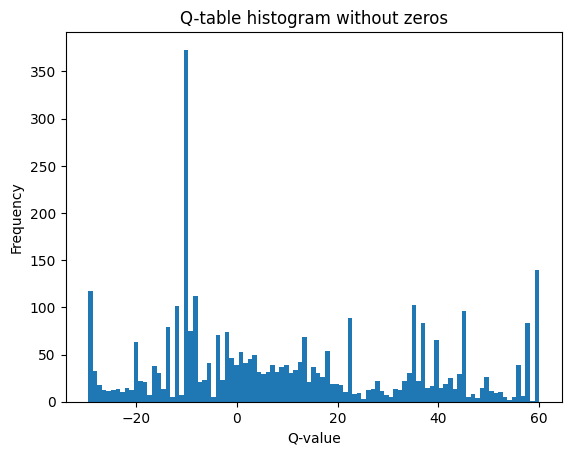

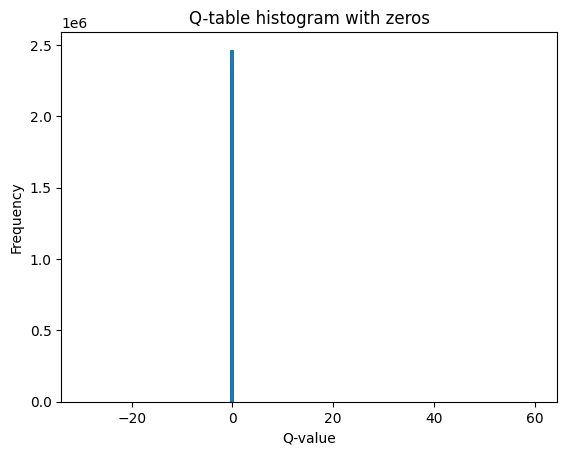

In [105]:
# watch how is distributed the Q-table

Qtable = np.load('../Qtable.npy')

print("Qtable shape : ", Qtable.shape)
print("Qtable min : ", Qtable.min())
print("Qtable max : ", Qtable.max())

HIST_BINS = np.linspace(Qtable.min(), Qtable.max(), 100)
# plot the histogram of the Q-table without the zeros
plt.hist(Qtable[Qtable != 0].flatten(), bins=HIST_BINS)
plt.title('Q-table histogram without zeros')
plt.xlabel('Q-value')
plt.ylabel('Frequency')
plt.show()

# plot the histogram of the Q-table with the zeros
plt.hist(Qtable.flatten(), bins=HIST_BINS)
plt.title('Q-table histogram with zeros')
plt.xlabel('Q-value')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

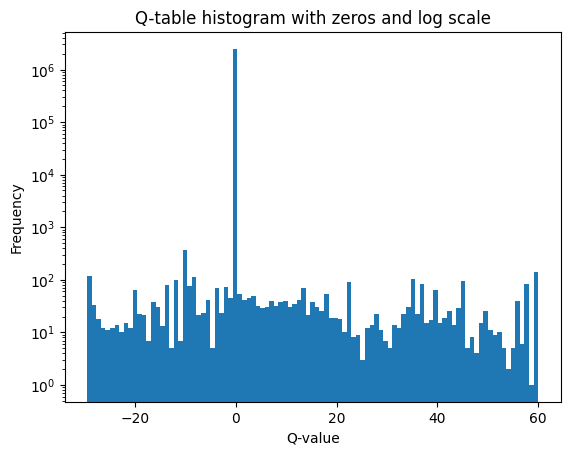

In [106]:
# plot the histogram of the Q-table with the zeros and the log scale
plt.hist(Qtable.flatten(), bins=HIST_BINS, log=True)
plt.title('Q-table histogram with zeros and log scale')
plt.xlabel('Q-value')
plt.ylabel('Frequency')